In [2]:
import kagglehub
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f"{path}/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [12]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [16]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [28]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

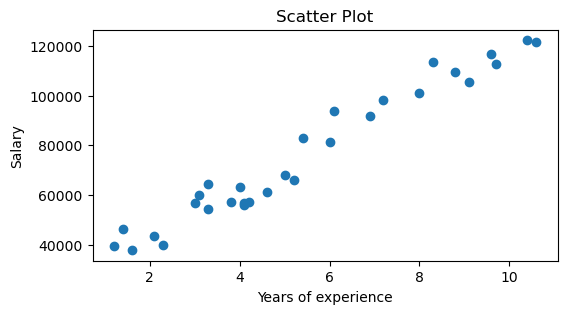

In [24]:
plt.figure(figsize = (6,3))

x = df['YearsExperience']
y = df['Salary']

plt.scatter(x, y)

plt.title('Scatter Plot')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

plt.show()

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df[['YearsExperience']]  # Make sure X is a DataFrame
y = df['Salary']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Scaling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse_no_scaling = mean_squared_error(y_test, y_pred)
r2_no_scaling = r2_score(y_test, y_pred)

# With Standard Scaling (theoretically not necessary for Standard Linear Regression with 1 variable)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

# Compare Results
print(f"Without Scaling -> MSE: {mse_no_scaling:.2f}, R²: {r2_no_scaling:.2f}")
print(f"With Scaling -> MSE: {mse_scaled:.2f}, R²: {r2_scaled:.2f}")

Without Scaling -> MSE: 49830096.86, R²: 0.90
With Scaling -> MSE: 49830096.86, R²: 0.90


In [ ]:
"""
- The model explainss 90% of the salary variations based on experience
- Scaling doesn’t help in this case
- Even though MSE is large, the R² means the model is still quite accurate at explaining salary trends
"""